2021-06-15 <br/> 
WEB Du Bois and Juneteenth <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-06-15/readme.md

Comparative counts -  Completed <br/>
Correlation matrix - Completed <br/>
Maps - Completed 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-15/tweets.csv')

In [3]:
df.head()

,datetime,content,retweet_count,like_count,quote_count,text,username,location,followers,url,verified,lat,long
0,2021-05-07T11:42:29Z,@sqlsekou You co-hosted the #DuBoisChallenge. ...,0.0,1.0,0.0,"<a href=""http://twitter.com/download/android"" ...",AlDatavizguy,New York,1113.0,https://twitter.com/AlDatavizguy/status/139063...,False,40.712728,-74.006015
1,2021-05-06T16:14:46Z,#DuBoisChallenge submission by Coleton Wood. @...,0.0,0.0,0.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",AlDatavizguy,New York,1113.0,https://twitter.com/AlDatavizguy/status/139033...,False,40.712728,-74.006015
2,2021-05-06T16:14:45Z,#DuBoisChallenge submission by Lucy Sillito #d...,0.0,0.0,0.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",AlDatavizguy,New York,1113.0,https://twitter.com/AlDatavizguy/status/139033...,False,40.712728,-74.006015
3,2021-05-06T16:14:45Z,Was doing a @tableaupublic search for #DuBoisC...,0.0,4.0,0.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",AlDatavizguy,New York,1113.0,https://twitter.com/AlDatavizguy/status/139033...,False,40.712728,-74.006015
4,2021-04-30T18:48:18Z,@ClintSmithIII @TheCrashCourse This sounds awe...,0.0,11.0,0.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",AlDatavizguy,New York,1113.0,https://twitter.com/AlDatavizguy/status/138820...,False,40.712728,-74.006015


<AxesSubplot:>

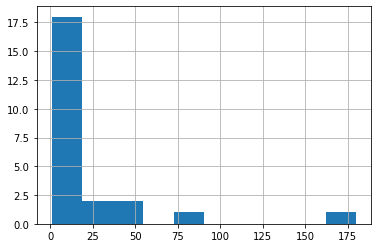

In [4]:
df.groupby('retweet_count')['retweet_count'].count().hist()

<AxesSubplot:>

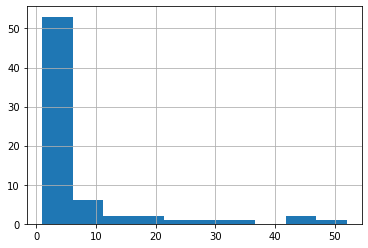

In [5]:
df.groupby('like_count')['like_count'].count().hist()

<AxesSubplot:>

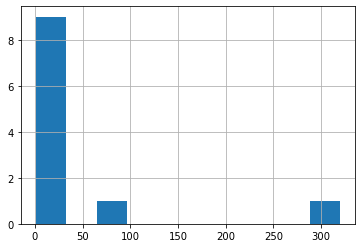

In [6]:
df.groupby('quote_count')['quote_count'].count().hist()

<AxesSubplot:xlabel='username'>

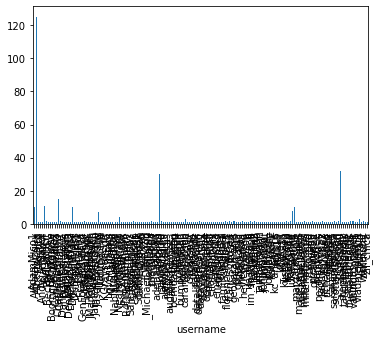

In [7]:
df.groupby('username')['username'].count().plot(kind='bar')

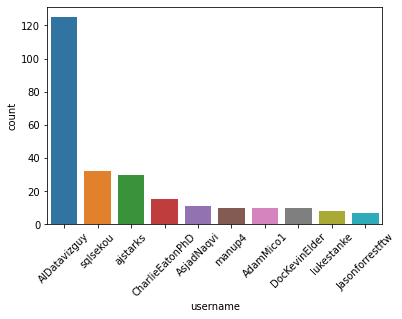

In [8]:
sns.countplot(data=df,x='username',order=df.username.value_counts().iloc[:10].index)
plt.xticks(rotation=45);

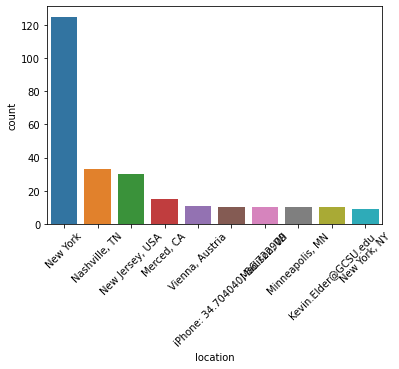

In [9]:
sns.countplot(data=df,x='location',order=df.location.value_counts().iloc[:10].index)
plt.xticks(rotation=45);

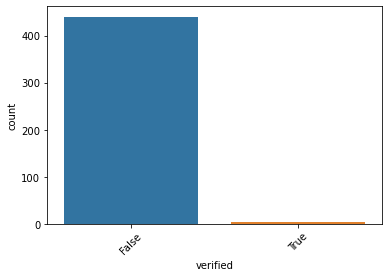

In [10]:
sns.countplot(data=df,x='verified',order=df.verified.value_counts().iloc[:10].index)
plt.xticks(rotation=45);

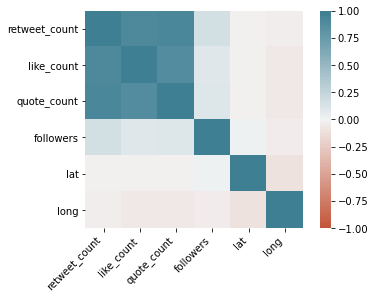

In [11]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [17]:
import plotly.graph_objects as go

import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
#df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        lon = df['long'],
        lat = df['lat'],
       text = df['text'],
        mode = 'markers',
        marker_color = df['like_count'],
        ))

fig.update_layout(
        title = 'Juneteenth interest',
        geo_scope='usa',
    )
fig.show()

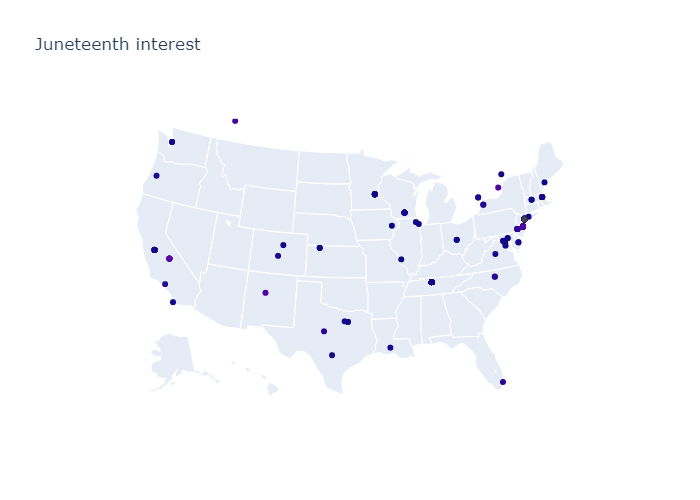

In [18]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)
